In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [37]:
class planet():
    def __init__(self, radius, mass, orbper, sma, symbol = None):
        """Planet class for storing planet parameters.

        Parameters
        ----------
        radius : float
            radius in R_earth
        mass : float
            mass in M_earth
        orbper : float
            orbital perdiod in days
        sma : float
            semi-major axis in AU
        """
        self.radius = radius
        self.mass = mass
        self.orbper = orbper
        self.sma = sma
        self.symbol = symbol

# Creating all the planets in our solar system
earth = planet(radius = 1, mass = 1, orbper = 365, sma = 1, symbol='☉')
jupiter = planet(radius = 11.209, mass = 317.8, orbper = 4332, sma = 5.2, symbol='♃')
neptune = planet(radius = 3.883, mass = 17.147, orbper = 60190, sma = 30.1, symbol='♆')
mars = planet(radius = 0.532, mass = 0.107, orbper = 687, sma = 1.52, symbol='♂')
venus = planet(radius = 0.949, mass = 0.815, orbper = 224.7, sma = 0.723, symbol='♀')
saturn = planet(radius = 9.449, mass = 95.159, orbper = 10759, sma = 9.54, symbol='♄')
uranus = planet(radius = 4.007, mass = 14.536, orbper = 30687, sma = 19.19, symbol='⛢')
mercury = planet(radius = 0.382, mass = 0.055, orbper = 88, sma = 0.387, symbol='☿')
# pluto = planet(radius = 0.186, mass = 0.002, orbper = 90560, sma = 39.48, symbol='♇')

# Creating a dictionary of all the planets
planets = {'earth': earth, 'jupiter': jupiter, 'neptune': neptune, 'mars': mars, 'venus': venus, 'saturn': saturn, 'uranus': uranus, 'mercury': mercury, 'pluto': pluto}


In [39]:
NEA_data = pd.read_csv('data/PS_2023.01.18_12.09.56.csv', header=100)
NEA_data.head()

♃


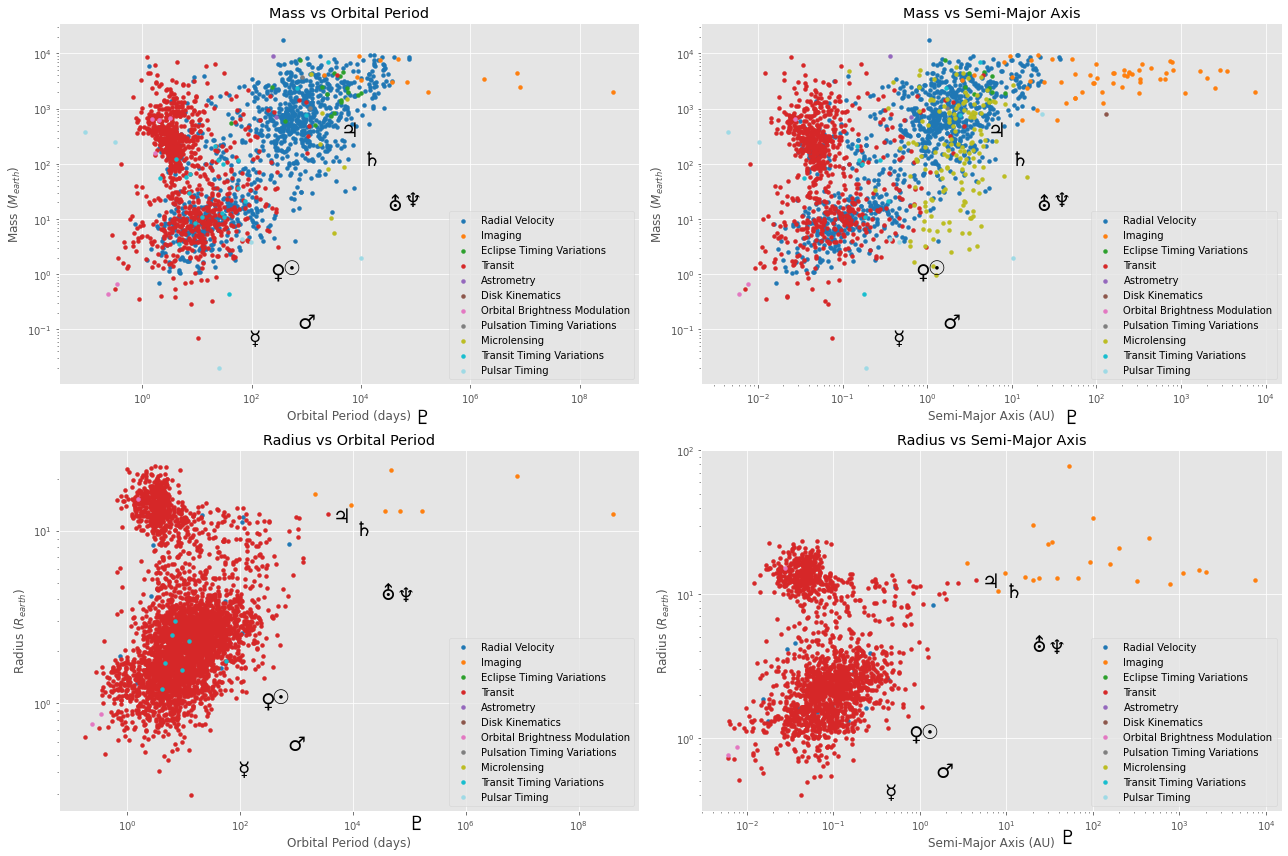

In [41]:
fig, axs = plt.subplots(2,2, figsize=(18,12))
plt.style.use('ggplot')
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(pd.unique(NEA_data['discoverymethod']))))
for i, method in enumerate(pd.unique(NEA_data['discoverymethod'])):
    axs[0][0].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbper'], NEA_data[NEA_data['discoverymethod'] == method]['pl_bmasse'], label=method, color=colors[i], s=15)
    axs[1][0].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbper'], NEA_data[NEA_data['discoverymethod'] == method]['pl_rade'], label=method, color=colors[i], s=15)
    axs[0][1].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbsmax'], NEA_data[NEA_data['discoverymethod'] == method]['pl_bmasse'], label=method, color=colors[i], s=15)
    axs[1][1].scatter(NEA_data[NEA_data['discoverymethod'] == method]['pl_orbsmax'], NEA_data[NEA_data['discoverymethod'] == method]['pl_rade'], label=method, color=colors[i], s=15)

for planet in planets:
    axs[0][0].text(planets[planet].orbper, planets[planet].mass, planets[planet].symbol, fontsize=20)
    axs[1][0].text(planets[planet].orbper, planets[planet].radius, planets[planet].symbol, fontsize=20)
    axs[0][1].text(planets[planet].sma, planets[planet].mass, planets[planet].symbol, fontsize=20)
    axs[1][1].text(planets[planet].sma, planets[planet].radius, planets[planet].symbol, fontsize=20)


for i,ax in enumerate(axs.flat):
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend()
axs[0][0].set_xlabel('Orbital Period (days)')
axs[0][0].set_ylabel(r'Mass ($M_{earth}$)')
axs[0][0].set_title('Mass vs Orbital Period')

axs[1][0].set_xlabel('Orbital Period (days)')
axs[1][0].set_ylabel(r'Radius ($R_{earth}$)')
axs[1][0].set_title('Radius vs Orbital Period')

axs[0][1].set_xlabel('Semi-Major Axis (AU)')
axs[0][1].set_ylabel(r'Mass ($M_{earth}$)')
axs[0][1].set_title('Mass vs Semi-Major Axis')

axs[1][1].set_xlabel('Semi-Major Axis (AU)')
axs[1][1].set_ylabel(r'Radius ($R_{earth}$)')
axs[1][1].set_title('Radius vs Semi-Major Axis')

plt.legend()
plt.tight_layout()
plt.show()